# Ashish Sharma

# Task 4 : Prediction using Decision Tree Algorithm

 # Importing the libraries and loading iris dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,:]
Y = iris.target

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
len(X[0])

4

In [5]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
print(len(X),len(Y))

150 150


In [7]:
print("Total No. of Examples in the dataset are",len(X))

Total No. of Examples in the dataset are 150


# Exploratory Data Analysis (EDA)

In [8]:
import numpy as np
import pandas as pd
data = pd.DataFrame(iris['data'],columns=['Petal length','Petal Width','Sepal length','Sepal Width'])
data['Species'] = iris['target']
data['Species'] = data['Species'].apply(lambda x: iris['target_names'][x])

In [9]:
data.head()

,Petal length,Petal Width,Sepal length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
data.shape

(150, 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
data.describe()

,Petal length,Petal Width,Sepal length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Check for null values

In [13]:
data.isnull().sum()


Petal length    0
Petal Width     0
Sepal length    0
Sepal Width     0
Species         0
dtype: int64

# Data visualization comparing various features

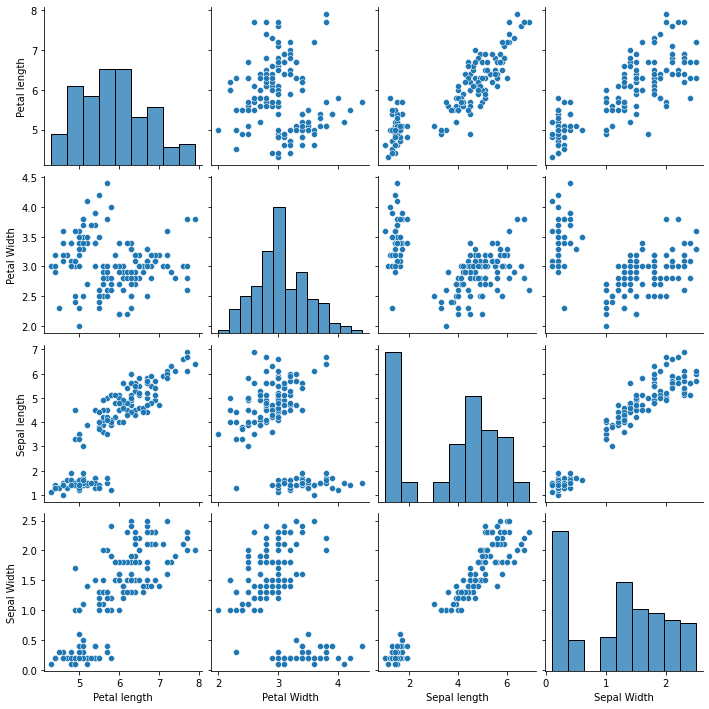

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)

# Scatter plot of data based on sepal length and width features

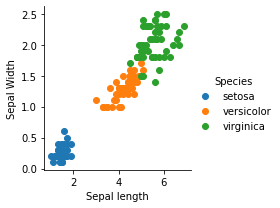

In [15]:
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal length','Sepal Width').add_legend()

 # Scatter plot of data based on petal length and width features

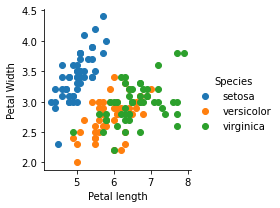

In [16]:
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal length','Petal Width').add_legend()

# Decesion Tree Model Training

In [17]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,Y_train)
print("Model Training Complete")
Y_pred = tree_classifier.predict(X_test)

Model Training Complete


# Comparing the Actual and Predicted Flower Classification

In [16]:

df = pd.DataFrame({'Actual': Y_test,'Predicted':Y_pred})

In [17]:
df

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,2
9,1,1


In [18]:
print("Accuracy of the Model: ",sm.accuracy_score(Y_test,Y_pred)*100,"%")

Accuracy of the Model:  96.0 %


# Visualizing the Trained Model

In [19]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


# Visualizing the trained Decesion Tree Classifier taking all 4 features in consideration

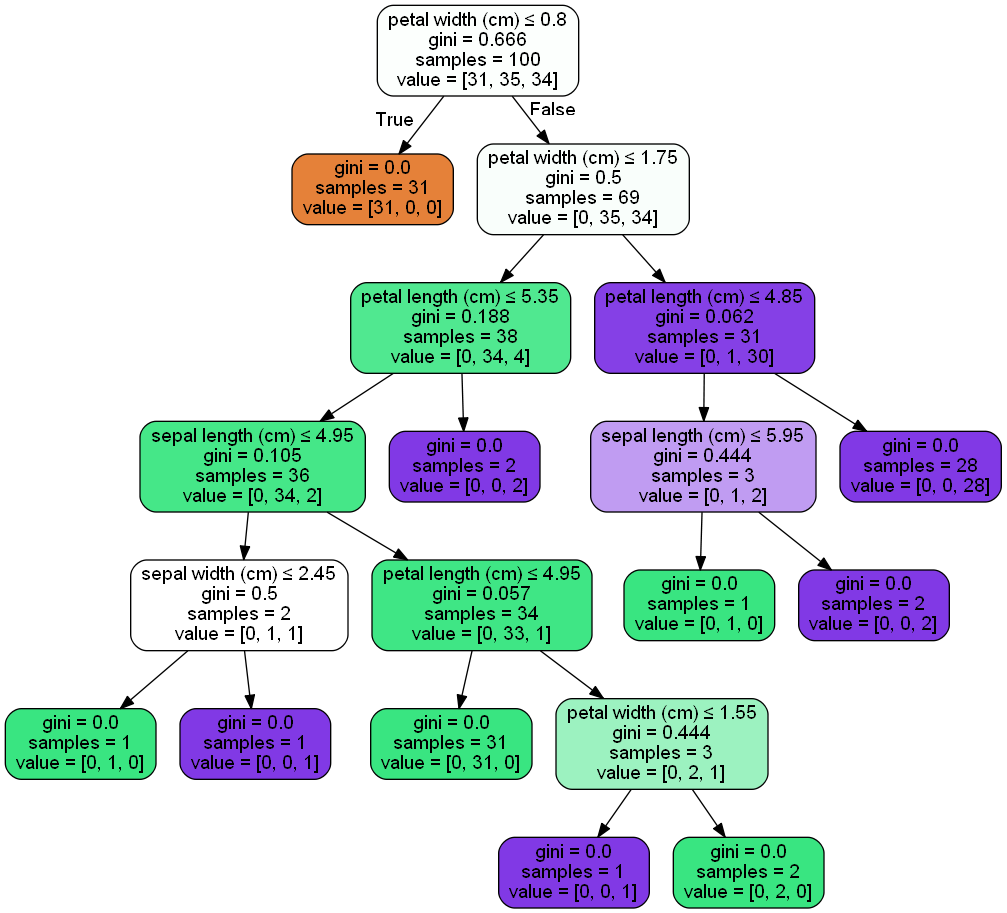

In [18]:
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(tree_classifier,out_file=dot_data,feature_names=iris.feature_names,
                filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())